In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

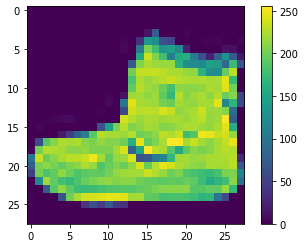

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images/255.0
test_images = test_images/255.0

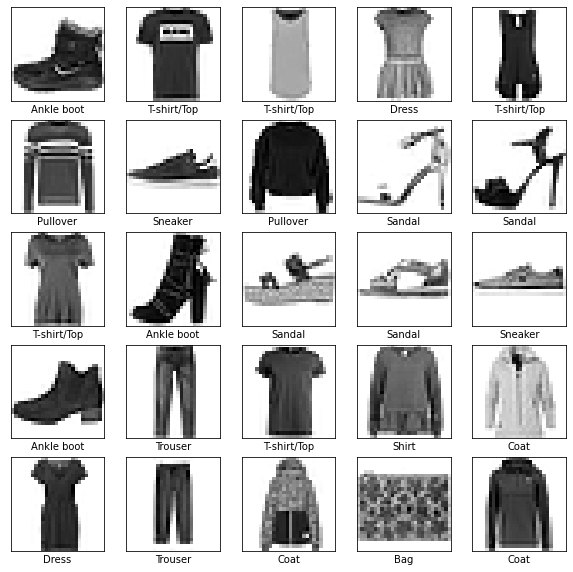

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

<p style="color:green; font-weight:bold;">BUDOWA MODELU</p>

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5010 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3768 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3366 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3127 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2939 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2792 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2692 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2565 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2463 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

In [14]:
#ocena modelu
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f"dokładność: {test_acc}, funkcja straty: {test_loss}")

313/313 - 1s - loss: 0.3232 - accuracy: 0.8840 - 573ms/epoch - 2ms/step
dokładność: 0.8840000033378601, funkcja straty: 0.32321158051490784


In [15]:
#Prognozowanie
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [17]:
predictions[0]

array([3.9188384e-07, 1.2671017e-08, 2.5925718e-07, 4.7286401e-09,
 1.6165743e-06, 9.0651988e-04, 8.6637147e-07, 4.2984691e-03,
 5.5816503e-07, 9.9479121e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [20]:
def plot_image(i,predictions_array,true_label,img):
    true_label,img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                            color=color)

In [23]:
def plot_value_array(i,predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

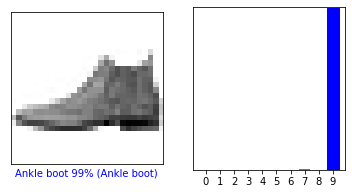

In [24]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

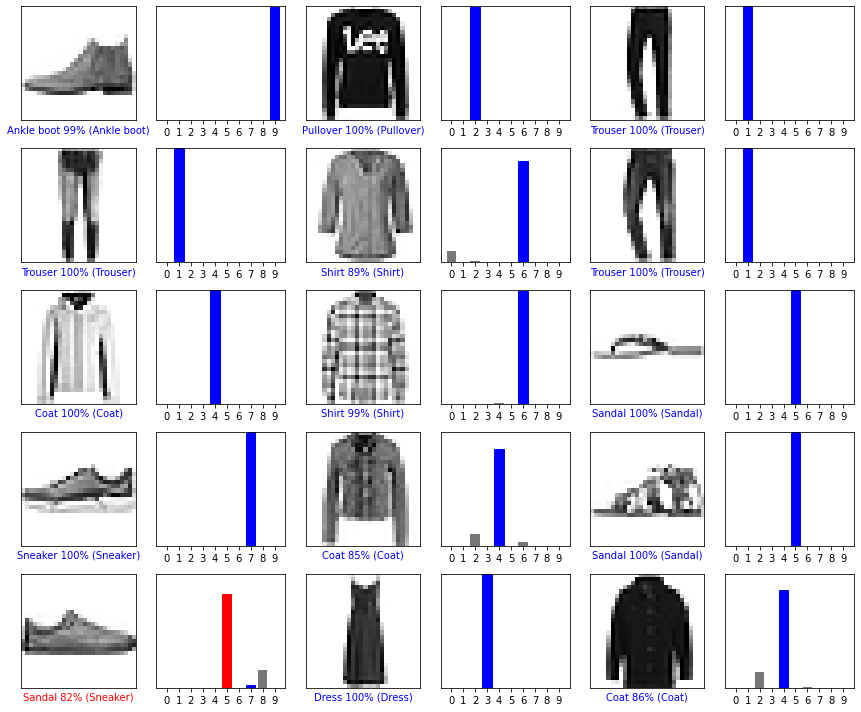

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [27]:
#użycie wyszkolonego modelu
img = test_images[1]
print(img.shape)

(28, 28)


In [28]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[1.6346274e-05 3.2456824e-15 9.9893957e-01 3.3304248e-11 7.8689581e-04
  2.2582591e-14 2.5724873e-04 1.2095300e-13 3.6567532e-10 1.7707176e-13]]


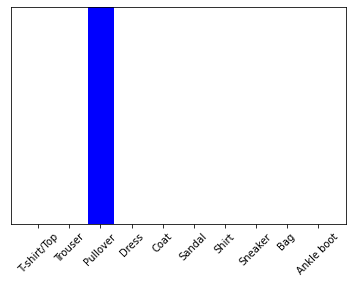

In [31]:
plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)
plt.show()

In [32]:
np.argmax(predictions_single[0])

2